# Softmax Regression
* The Softmax regression is a form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1.
* This is a type of Losgistic Regression in which we classify the more than 2 classes for example 0 1 and another class 2 or more.This is also known as Multinomial Logistic Regression.

# Loss function for Softmax Regression 
<img title='Cost Function for Softmax Regression' src='Cost+Function.jpg' height=600 width=600 />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[['sepal_length','sepal_width','species']]
df.head()

,sepal_length,sepal_width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [10]:
clf = LogisticRegression(multi_class='multinomial') # for softmax regression

In [11]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(accuracy_score(y_test, y_pred))

0.7666666666666667


In [14]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,13,1,0
1,0,4,4
2,0,2,6


In [15]:
# prediction
query = np.array([[3.4, 2.7]])
clf.predict_proba(query)

array([[9.80994083e-01, 1.87535896e-02, 2.52327111e-04]])

In [16]:
clf.predict(query) # maximum value in the probability

array([0])

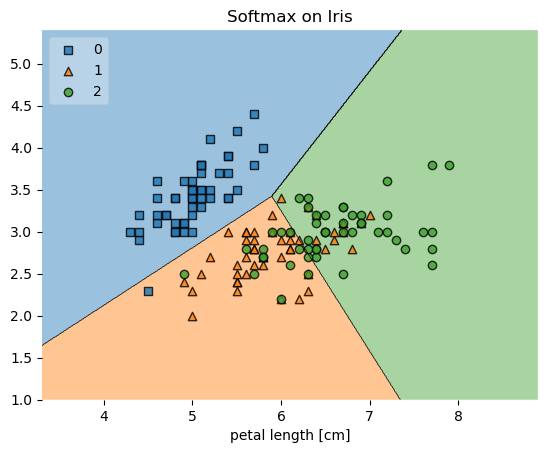

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=clf, legend=2)

# adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()